## Waste Management using CNN


In [1]:
# pip install opencv-python

In [33]:
# pip install tensorflow

In [65]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [66]:
# pip install pandas --index-url=https://pypi.org/simple

In [67]:
# pip install matplotlib --user

In [68]:
# pip install tqdm --user

In [40]:
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"

In [69]:
# import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [70]:
import cv2
import os
import pandas as pd
from glob import glob
from tqdm import tqdm  # Progress bar

train_path = "DATASET\\TRAIN"  # Update this with your actual path

x_data = []
y_data = []

for category in glob(os.path.join(train_path, '*')):  # Iterate through category folders
    for file in tqdm(glob(os.path.join(category, '*'))):  # Iterate through image files
        img_array = cv2.imread(file)

        if img_array is None:
            print(f"Warning: Skipping unreadable image {file}")  # Debugging print
            continue  # Skip if image is not loaded

        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        x_data.append(img_array)  # Append valid image
        y_data.append(os.path.basename(category))  # Append label (category name)

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Debugging: Check if images are added
print(f"Total images loaded: {len(data)}")
print("DataFrame Preview:\n", data.head())

100%|██████████| 9999/9999 [00:08<00:00, 1161.43it/s]


Total images loaded: 22564
DataFrame Preview:
                                                image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...     O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...     O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     O


In [71]:
print("Example file:", glob(os.path.join(train_path, '*'))[:5])

Example file: ['DATASET\\TRAIN\\O', 'DATASET\\TRAIN\\R']


In [72]:
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path +'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append((img_array))
        y_data.append(category.split('\\')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:09<00:00, 1054.56it/s]


In [73]:
data.shape

(22564, 2)

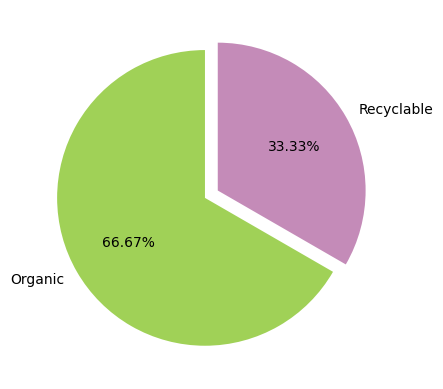

In [74]:
import matplotlib.pyplot as plt  # Import the required library
import pandas as pd  # Ensure pandas is also imported if you are using DataFrame

# Sample data for the pie chart (replace with your actual data)
data = pd.DataFrame({
    'label': ['Organic', 'Recyclable', 'Organic', 'Recyclable', 'Organic', 'Organic']
})

# Pie chart code
colors = ['#a0d157', '#c48bb8']
plt.pie(data['label'].value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', 
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

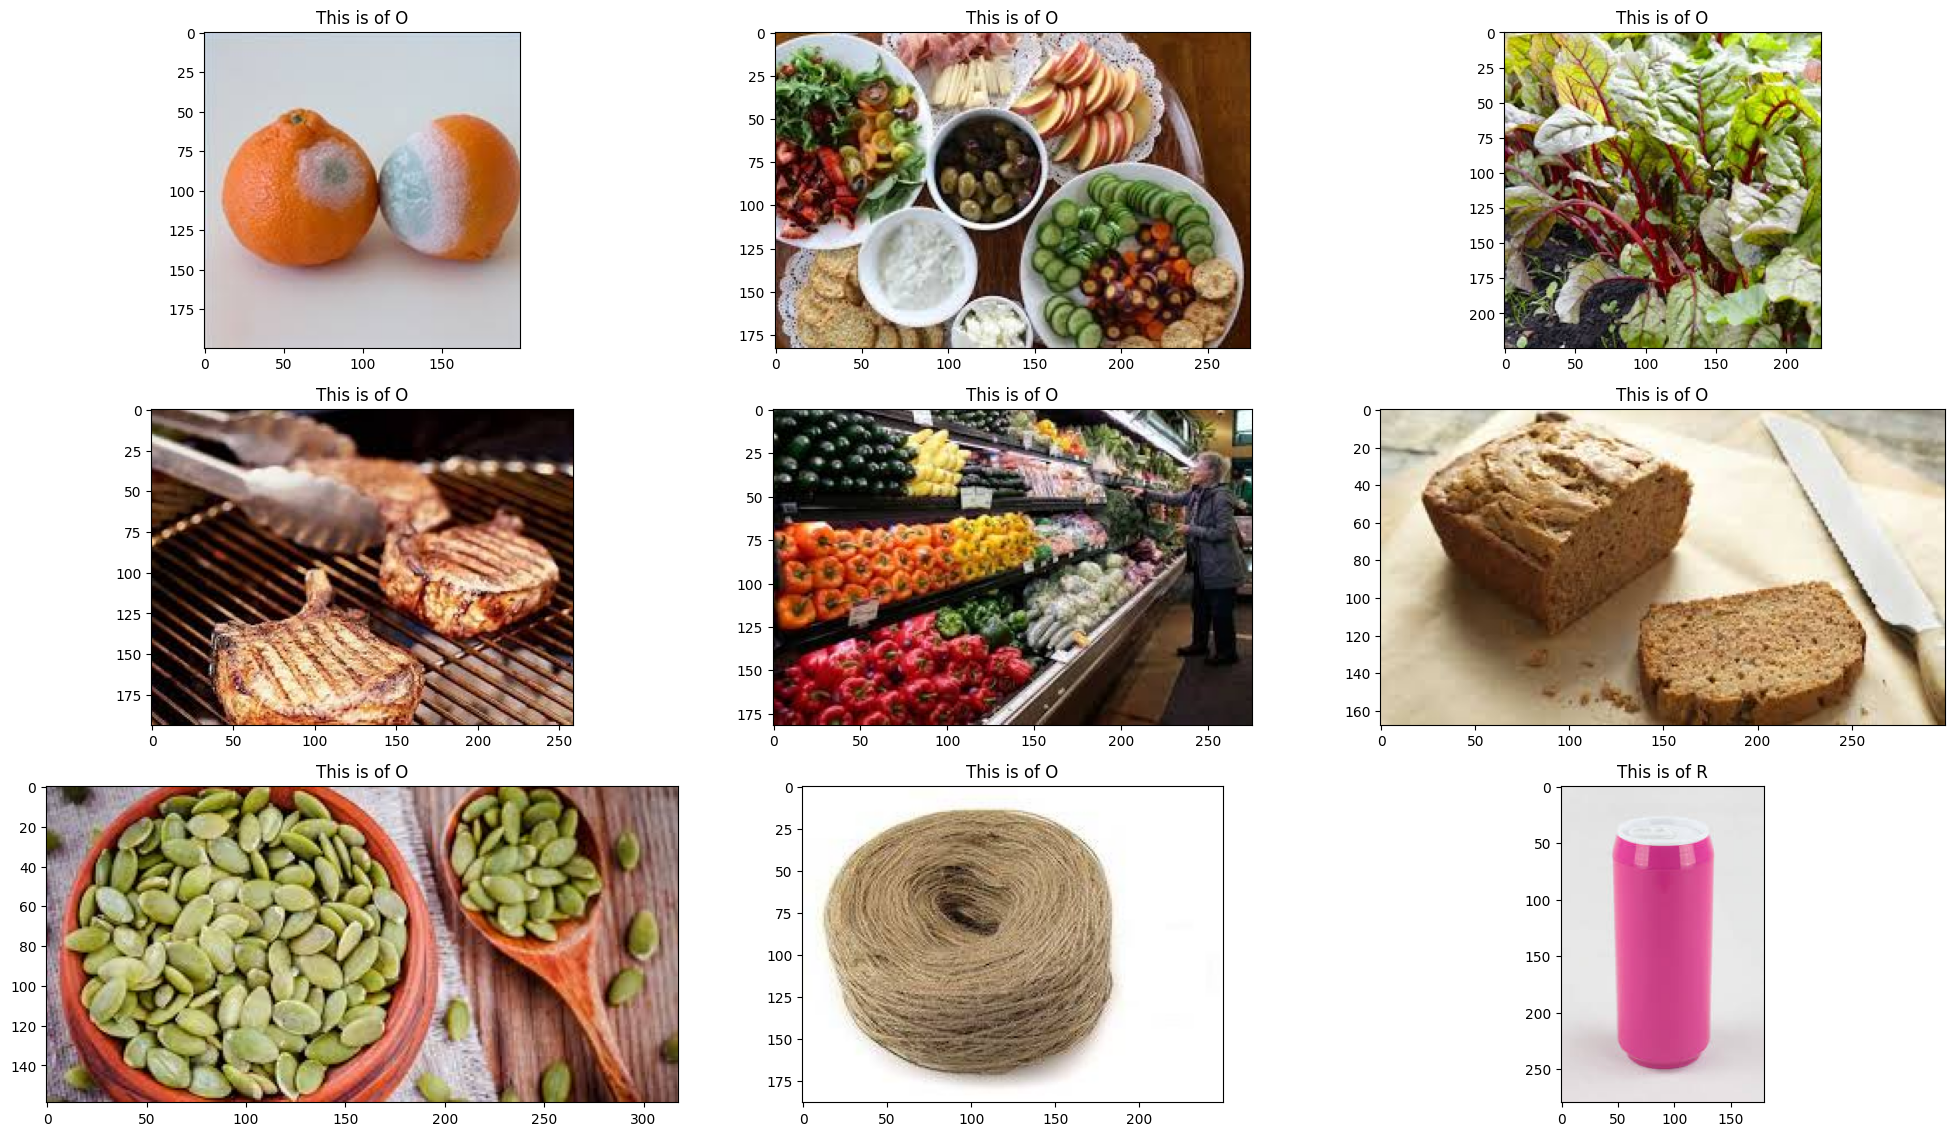

In [121]:
#to train

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data}) 

plt.figure(figsize=(20,15))

# Loop through 9 random images and display them
for i in range(9):
   plt.subplot(4,3,(i % 12) +1)
   index= np.random.randint(15000)
   plt.title('This is of {0}'. format(data.label[index]))
   plt.imshow(data.image[index])
   plt.tight_layout()


In [108]:
## CNN Convolutional Neural Network

In [77]:

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=256

In [78]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [80]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [81]:


train_generator = train_datagen.flow_from_directory(
    train_path,                  # Path to your training data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

# Load images from the directory for testing/validation
test_generator = test_datagen.flow_from_directory(
    test_path,                   # Path to your test data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [46]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


# Define necessary variables for paths and batch size
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"   

# Ensure dataset path exits
if not os.path.exists(train_path) or not os.path.exists(test_path): 
       raise FileNotFoundError("Dataset directories not found. Check 'train_path' and 'test_path'.") 

#Define batch size
batch_size = 32

# Define the ImageDataGenerator for train data or test data (Ensure it's initialized)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values


# Load images from the directory for training
train_generator = train_datagen.flow_from_directory(
    train_path,                  # Path to your training data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

# Load images from the directory for testing/validation
test_generator = test_datagen.flow_from_directory(
    test_path,                   # Path to your test data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

#Get number of classes dynamically
num_classes = train_generator.num_classes #Auto-detect classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust for the number of classes in your data
])

#select the correct loss function based on class mode 
loss_function ='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'

#compile te model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    train_generator,                # Training data
    epochs=10,                      # Number of epochs
    validation_data=test_generator  # Validation data
)

print("Model training completed successfully!")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 571s 805ms/step - accuracy: 0.7463 - loss: 2.2833 - val_accuracy: 0.8078 - val_loss: 0.4538
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 561s 795ms/step - accuracy: 0.8519 - loss: 0.3574 - val_accuracy: 0.8134 - val_loss: 0.4198
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 589s 835ms/step - accuracy: 0.8968 - loss: 0.2612 - val_accuracy: 0.8217 - val_loss: 0.4800
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 563s 797ms/step - accuracy: 0.9407 - loss: 0.1654 - val_accuracy: 0.8380 - val_loss: 0.5675
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 550s 780ms/step - accuracy: 0.9617 - loss: 0.1116 - val_accuracy: 0.8038 - val_loss: 0.6888
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 538s 761ms/step - accuracy: 0.9724 - loss: 0.0836 - val_accuracy: 0.8217 - val_loss: 0.7117
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 554s 784ms/step - accuracy: 0.9793 - loss: 0.0731 - val_accuracy: 0.7943 - val_loss: 0.8924
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 558s 791ms/step - accuracy: 0.9902 -

In [82]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust for the number of classes in your data
])

#compile te model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [83]:
model.save('plastic_waste_classification_model.keras')

In [84]:
from tensorflow.keras.models import load_model
model=load_model('plastic_waste_classification_model.keras')